In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Download data with yfinance
ticker = 'UNHH34.SA'
start_date = '2015-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

df = yf.download(ticker, start=start_date, end=end_date)
#data.reset_index(inplace=True)
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df = df.dropna()
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,log_return
Ticker,UNHH34.SA,UNHH34.SA,UNHH34.SA,UNHH34.SA,UNHH34.SA,
Date,,,,,,
2019-06-19,12.509822,12.509822,12.509822,12.509822,0,0.000000
2019-06-21,12.703470,12.703470,12.703470,12.703470,2800,0.015361
2019-06-24,12.703470,12.703470,12.703470,12.703470,0,0.000000
2019-06-25,12.703470,12.703470,12.703470,12.703470,0,0.000000
2019-06-26,12.703470,12.703470,12.703470,12.703470,0,0.000000


In [2]:
forecast_days = 10
df['Prediction'] = df[['Close']].shift(-forecast_days)

X = df['Close'].to_numpy()
X = X[:-forecast_days]
y = df['Prediction'].to_numpy()
y = y[:-forecast_days]

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [10]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=1e3, gamma=0.1, degree=3)
model.fit(X_train, y_train)

,kernel,'linear'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,100.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [11]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8630793340621473


In [12]:
import utils.date_utils as dutils
forecast_set = model.predict(X[-forecast_days:])

last_date = df.iloc[-1].name
days = dutils.get_next_workdays(last_date, forecast_days)
forecast = pd.DataFrame(forecast_set, columns=['Close'], index=days)


Text(0, 0.5, 'Price')

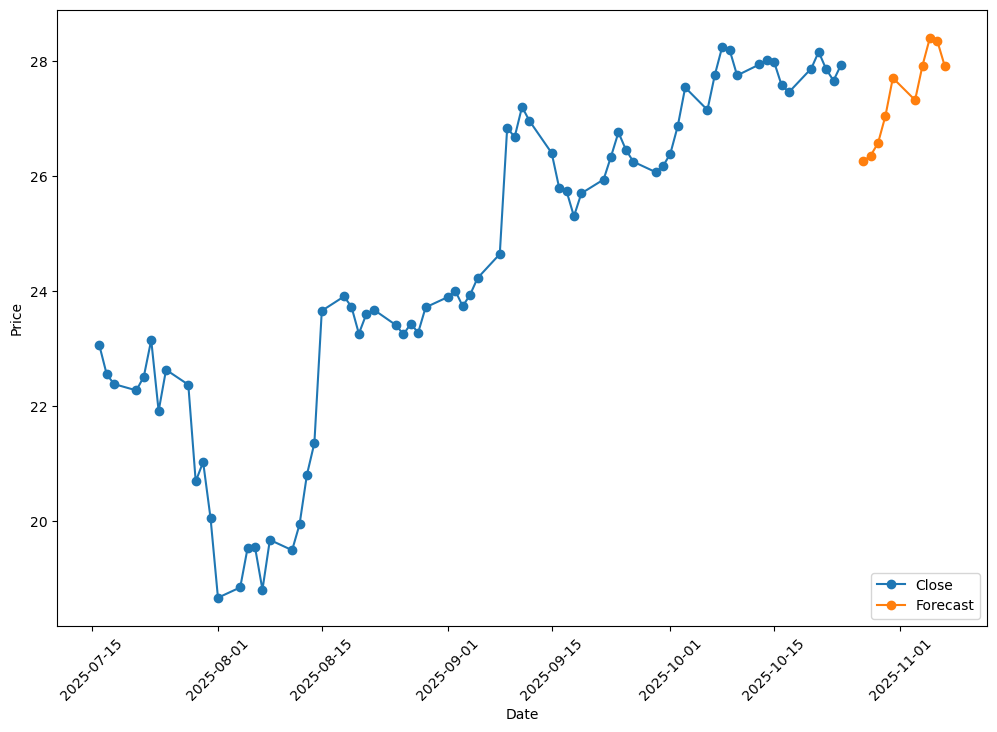

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(df['Close'].loc[df.index > '2025-07-15'], label='Close', marker='o')
plt.plot(forecast['Close'], label='Forecast', marker='o')
plt.legend(loc=4)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')